In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib
import pickle

### Helper Function

In [2]:
def transport_delay(data, tau, time_step, initial_value):
    """
    Applies a transport delay to a 1D NumPy array of time series data.

    Parameters:
    - data: 1D NumPy array containing the time series data.
    - tau: The delay in seconds.
    - time_step: The time step between consecutive samples in seconds.
    - initial_value: The value to fill in the delayed portion of the array.

    Returns:
    - delayed_data: The array with the applied delay.
    """
    if not isinstance(data, np.ndarray):
        raise ValueError("data should be a NumPy array")

    if data.ndim != 1:
        raise ValueError("data should be a 1D array")

    # Calculate the number of samples to delay
    delay_steps = int(round(tau / time_step))

    # Ensure delay_steps is non-negative
    delay_steps = max(delay_steps, 0)

    # Create an array with the same shape as data, filled with initial_value
    delayed_data = np.full_like(data, initial_value)

    # Apply the delay by shifting the data array
    if delay_steps < len(data):
        delayed_data[delay_steps:] = data[:-delay_steps]
    else:
        # If delay_steps is larger than the data length, return all initial values
        delayed_data = np.full_like(data, initial_value)

    return delayed_data

### Start of the code

In [2]:
file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\X_train.csv"
X_train = pd.read_csv(file_path, header = None).to_numpy()

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\X_test.csv"
X_test = pd.read_csv(file_path, header = None).to_numpy()

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\y_train.csv"
y_train = pd.read_csv(file_path, header = None).to_numpy()

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\y_test.csv"
y_test = pd.read_csv(file_path, header = None).to_numpy()

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\pilotoutputtest.csv"
p_test = pd.read_csv(file_path, header = None).to_numpy()

file_path = r"C:\Users\steph\OneDrive\Desktop\Stephen\ADCL\thesis stuff\ALL THESIS DATA\scikitlearn data\cmd3_flightsimulator_invariant_cessna172\pitcherrortest.csv"
pitch_error_test = pd.read_csv(file_path, header = None).to_numpy()

In [3]:
# check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape, p_test.shape, pitch_error_test.shape

((594, 5000), (149, 5000), (594, 5000), (149, 5000), (149, 1000), (149, 1000))

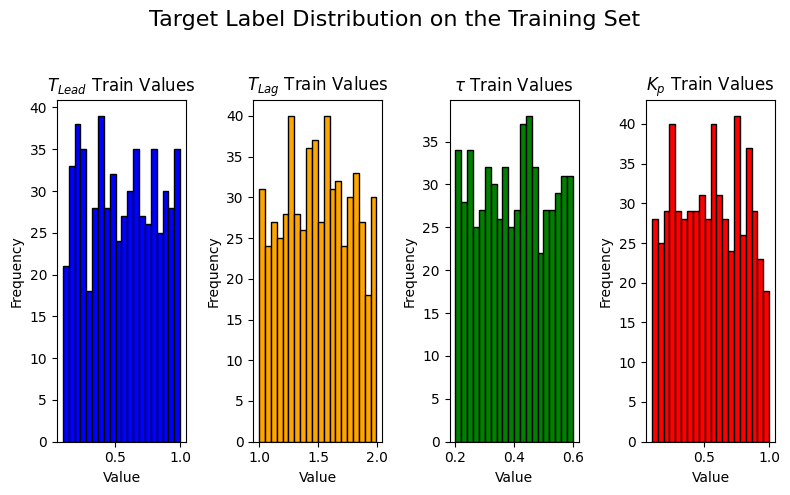

In [27]:
tld_train = y_train[:,1000:2000].mean(axis=1)
tlg_train = y_train[:,2000:3000].mean(axis=1)
tau_train = y_train[:,3000:4000].mean(axis=1)
kp_train = y_train[:,4000:5000].mean(axis=1)
import matplotlib.pyplot as plt
import numpy as np

# Create a 1x4 subplot
fig, axes = plt.subplots(1, 4, figsize=(8,5))

# Plot histograms for each feature
axes[0].hist(tld_train, bins=20, color='blue', edgecolor='black')
axes[0].set_title('$T_{Lead}$ Train Values')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(tlg_train, bins=20, color='orange', edgecolor='black')
axes[1].set_title('$T_{Lag}$ Train Values')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

axes[2].hist(tau_train, bins=20, color='green', edgecolor='black')
axes[2].set_title(r'$\tau$ Train Values')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

axes[3].hist(kp_train, bins=20, color='red', edgecolor='black')
axes[3].set_title('$K_{p}$ Train Values')
axes[3].set_xlabel('Value')
axes[3].set_ylabel('Frequency')

# Set global title
fig.suptitle('Target Label Distribution on the Training Set', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the global title

# Show the plot
plt.show()


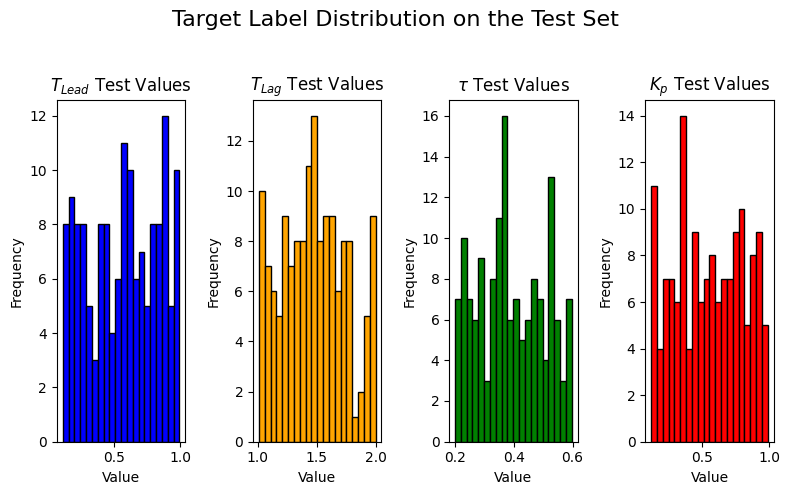

In [29]:
tld_train = y_test[:,1000:2000].mean(axis=1)
tlg_train = y_test[:,2000:3000].mean(axis=1)
tau_train = y_test[:,3000:4000].mean(axis=1)
kp_train = y_test[:,4000:5000].mean(axis=1)
import matplotlib.pyplot as plt
import numpy as np

# Create a 1x4 subplot
fig, axes = plt.subplots(1, 4, figsize=(8,5))

# Plot histograms for each feature
axes[0].hist(tld_train, bins=20, color='blue', edgecolor='black')
axes[0].set_title('$T_{Lead}$ Test Values')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(tlg_train, bins=20, color='orange', edgecolor='black')
axes[1].set_title('$T_{Lag}$ Test Values')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

axes[2].hist(tau_train, bins=20, color='green', edgecolor='black')
axes[2].set_title(r'$\tau$ Test Values')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

axes[3].hist(kp_train, bins=20, color='red', edgecolor='black')
axes[3].set_title('$K_{p}$ Test Values')
axes[3].set_xlabel('Value')
axes[3].set_ylabel('Frequency')

# Set global title
fig.suptitle('Target Label Distribution on the Test Set', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the global title

# Show the plot
plt.show()


## Ridge Regression

In [4]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# create the model
ridge_model = Ridge()

# fit the model
ridge_model.fit(X_train, y_train)

# predict the model
ridge_pred = ridge_model.predict(X_test)

# obtain the error metrics
x_true, x_pred_ridge = y_test[:,:1000], ridge_pred[:,:1000]
tld_true, tld_pred_ridge = y_test[:,1000:2000], ridge_pred[:,1000:2000]
tlg_true, tlg_pred_ridge = y_test[:,2000:3000], ridge_pred[:,2000:3000]
tau_true, tau_pred_ridge = y_test[:,3000:4000], ridge_pred[:,3000:4000]
kp_true, kp_pred_ridge = y_test[:,4000:5000], ridge_pred[:,4000:5000]

In [5]:
import joblib
# Save the model
joblib.dump(ridge_model, 'scitechpaper1_ridge.pkl')

['scitechpaper1_ridge.pkl']

In [31]:
mean_squared_error(x_true, x_pred_ridge)

1.030293185900893e-05

In [32]:
mean_squared_error(tld_true, tld_pred_ridge), mean_squared_error(tlg_true, tlg_pred_ridge) , mean_squared_error(tau_true, tau_pred_ridge), mean_squared_error(kp_true, kp_pred_ridge)

(0.009187957196508471,
 0.01818759770748923,
 0.0003355444811414764,
 0.000627872726522315)

In [33]:
# Initialize an empty list to store the tensors
pilot_output_predicted_list = []

for k in range(len(X_test)):
  tld_est_int = tld_pred_ridge[k,:]
  tlg_est_int = tlg_pred_ridge[k,:]
  tau_est_int = tau_pred_ridge[k,:]
  tau_est_avg = tau_est_int.mean()
  kp_est_int = kp_pred_ridge[k,:]

  pitcherror_t_tau = transport_delay(pitch_error_test[k,:], tau_est_avg, 0.1, pitch_error_test[k,:][0])
  pilot_output_predicted = (-kp_est_int/(tlg_est_int*tlg_est_int)) * (tlg_est_int-tld_est_int) * x_pred_ridge[k,:] - (kp_est_int*tld_est_int/tlg_est_int)*pitcherror_t_tau

  # Append to the list
  pilot_output_predicted_list.append(pilot_output_predicted)


# Convert the list to a 2D tensor (NumPy array)
pilot_output_predicted_tensor = np.stack(pilot_output_predicted_list)

pilot_output_predicted_tensor.shape, p_test.shape
mean_squared_error(p_test,pilot_output_predicted_tensor)

2.130224974028155e-06

## Decision Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

dt_model.fit(X_train, y_train)

# predict the model
dt_pred = dt_model.predict(X_test)

# obtain the error metrics
x_true, x_pred_dt = y_test[:,:1000], dt_pred[:,:1000]
tld_true, tld_pred_dt = y_test[:,1000:2000], dt_pred[:,1000:2000]
tlg_true, tlg_pred_dt = y_test[:,2000:3000], dt_pred[:,2000:3000]
tau_true, tau_pred_dt = y_test[:,3000:4000], dt_pred[:,3000:4000]
kp_true, kp_pred_dt = y_test[:,4000:5000], dt_pred[:,4000:5000]

In [7]:
# Save the model
joblib.dump(dt_model, 'scitechpaper1_dt.pkl')

['scitechpaper1_dt.pkl']

In [35]:
mean_squared_error(x_true, x_pred_dt)

3.91457144975194e-05

In [36]:
mean_squared_error(tld_true, tld_pred_dt), mean_squared_error(tlg_true, tlg_pred_dt) , mean_squared_error(tau_true, tau_pred_dt), mean_squared_error(kp_true, kp_pred_dt)

(0.022607058147904584,
 0.05056296315657454,
 0.006858739787705963,
 0.006954427113963916)

In [37]:
# Initialize an empty list to store the tensors
pilot_output_predicted_list = []

for k in range(len(X_test)):
  tld_est_int = tld_pred_dt[k,:]
  tlg_est_int = tlg_pred_dt[k,:]
  tau_est_int = tau_pred_dt[k,:]
  tau_est_avg = tau_est_int.mean()
  kp_est_int = kp_pred_dt[k,:]

  pitcherror_t_tau = transport_delay(pitch_error_test[k,:], tau_est_avg, 0.1, pitch_error_test[k,:][0])
  pilot_output_predicted = (-kp_est_int/(tlg_est_int*tlg_est_int)) * (tlg_est_int-tld_est_int) * x_pred_dt[k,:] - (kp_est_int*tld_est_int/tlg_est_int)*pitcherror_t_tau

  # Append to the list
  pilot_output_predicted_list.append(pilot_output_predicted)


# Convert the list to a 2D tensor (NumPy array)
pilot_output_predicted_tensor = np.stack(pilot_output_predicted_list)

pilot_output_predicted_tensor.shape, p_test.shape
mean_squared_error(p_test,pilot_output_predicted_tensor)

2.222363571615694e-06

## KNN

In [8]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()

knn_model.fit(X_train, y_train)

# predict the model
knn_pred = knn_model.predict(X_test)

# obtain the error metrics
x_true, x_pred_knn = y_test[:,:1000], knn_pred[:,:1000]
tld_true, tld_pred_knn = y_test[:,1000:2000], knn_pred[:,1000:2000]
tlg_true, tlg_pred_knn = y_test[:,2000:3000], knn_pred[:,2000:3000]
tau_true, tau_pred_knn = y_test[:,3000:4000], knn_pred[:,3000:4000]
kp_true, kp_pred_knn = y_test[:,4000:5000], knn_pred[:,4000:5000]



In [9]:
# Save the model
joblib.dump(knn_model, 'scitechpaper1_knn.pkl')

['scitechpaper1_knn.pkl']

In [39]:
mean_squared_error(x_true, x_pred_knn)

2.574810307591133e-05

In [40]:
mean_squared_error(tld_true, tld_pred_knn), mean_squared_error(tlg_true, tlg_pred_knn) , mean_squared_error(tau_true, tau_pred_knn), mean_squared_error(kp_true, kp_pred_knn)

(0.02389125724143357,
 0.06054972332961183,
 0.00038991188197669773,
 0.0012953542640269356)

In [41]:
# Initialize an empty list to store the tensors
pilot_output_predicted_list = []

for k in range(len(X_test)):
  tld_est_int = tld_pred_knn[k,:]
  tlg_est_int = tlg_pred_knn[k,:]
  tau_est_int = tau_pred_knn[k,:]
  tau_est_avg = tau_est_int.mean()
  kp_est_int = kp_pred_knn[k,:]

  pitcherror_t_tau = transport_delay(pitch_error_test[k,:], tau_est_avg, 0.1, pitch_error_test[k,:][0])
  pilot_output_predicted = (-kp_est_int/(tlg_est_int*tlg_est_int)) * (tlg_est_int-tld_est_int) * x_pred_knn[k,:] - (kp_est_int*tld_est_int/tlg_est_int)*pitcherror_t_tau

  # Append to the list
  pilot_output_predicted_list.append(pilot_output_predicted)


# Convert the list to a 2D tensor (NumPy array)
pilot_output_predicted_tensor = np.stack(pilot_output_predicted_list)

pilot_output_predicted_tensor.shape, p_test.shape

mean_squared_error(p_test,pilot_output_predicted_tensor)

1.8681323478652182e-06

## Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,         # Number of trees
    max_depth=10,             # Limit tree depth
    max_features='sqrt',      # Use a subset of features
    n_jobs=-1,                # Use all CPU cores
    max_samples=0.8,          # Use 80% of the samples for each tree (if using scikit-learn >= 0.22)
    random_state=42)

rf_model.fit(X_train, y_train)

# predict the model
rf_pred = rf_model.predict(X_test)

# obtain the error metrics
x_true, x_pred_rf = y_test[:,:1000], rf_pred[:,:1000]
tld_true, tld_pred_rf = y_test[:,1000:2000], rf_pred[:,1000:2000]
tlg_true, tlg_pred_rf = y_test[:,2000:3000], rf_pred[:,2000:3000]
tau_true, tau_pred_rf = y_test[:,3000:4000], rf_pred[:,3000:4000]
kp_true, kp_pred_rf = y_test[:,4000:5000], rf_pred[:,4000:5000]

In [11]:
# Save the model
joblib.dump(rf_model, 'scitechpaper1_rf.pkl')

['scitechpaper1_rf.pkl']

In [43]:
mean_squared_error(x_true, x_pred_rf)

2.099659144726434e-05

In [44]:
mean_squared_error(tld_true, tld_pred_rf), mean_squared_error(tlg_true, tlg_pred_rf) , mean_squared_error(tau_true, tau_pred_rf), mean_squared_error(kp_true, kp_pred_rf)

(0.015830353027856462,
 0.03179985158780974,
 0.0016633864005465985,
 0.001030734768699949)

In [45]:
# Initialize an empty list to store the tensors
pilot_output_predicted_list = []

for k in range(len(X_test)):
  tld_est_int = tld_pred_rf[k,:]
  tlg_est_int = tlg_pred_rf[k,:]
  tau_est_int = tau_pred_rf[k,:]
  tau_est_avg = tau_est_int.mean()
  kp_est_int = kp_pred_rf[k,:]

  pitcherror_t_tau = transport_delay(pitch_error_test[k,:], tau_est_avg, 0.1, pitch_error_test[k,:][0])
  pilot_output_predicted = (-kp_est_int/(tlg_est_int*tlg_est_int)) * (tlg_est_int-tld_est_int) * x_pred_rf[k,:] - (kp_est_int*tld_est_int/tlg_est_int)*pitcherror_t_tau

  # Append to the list
  pilot_output_predicted_list.append(pilot_output_predicted)


# Convert the list to a 2D tensor (NumPy array)
pilot_output_predicted_tensor = np.stack(pilot_output_predicted_list)

pilot_output_predicted_tensor.shape, p_test.shape

mean_squared_error(p_test,pilot_output_predicted_tensor)

1.8330736244206062e-06

## SVR (39 minutes to run)

In [12]:

from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

# Initialize and train MultiOutputRegressor with SVR
svr = SVR()
svr_model = MultiOutputRegressor(svr)

svr_model.fit(X_train, y_train)

# predict the model
svr_pred = svr_model.predict(X_test)

# obtain the error metrics
x_true, x_pred_svr = y_test[:,:1000], svr_pred[:,:1000]
tld_true, tld_pred_svr = y_test[:,1000:2000], svr_pred[:,1000:2000]
tlg_true, tlg_pred_svr = y_test[:,2000:3000], svr_pred[:,2000:3000]
tau_true, tau_pred_svr = y_test[:,3000:4000], svr_pred[:,3000:4000]
kp_true, kp_pred_svr = y_test[:,4000:5000], svr_pred[:,4000:5000]

In [ ]:
# Save the model
joblib.dump(svr_model, 'scitechpaper1_svr.pkl') # do not try this, this crashed my laptop lol

In [48]:
mean_squared_error(x_true, x_pred_svr)

0.0019367810875797272

In [47]:
mean_squared_error(tld_true, tld_pred_svr), mean_squared_error(tlg_true, tlg_pred_svr) , mean_squared_error(tau_true, tau_pred_svr), mean_squared_error(kp_true, kp_pred_svr)

(0.020252576618067068,
 0.04523927938510005,
 0.002123868906816174,
 0.0020375688796925896)

In [49]:
# Initialize an empty list to store the tensors
pilot_output_predicted_list = []

for k in range(len(X_test)):
  tld_est_int = tld_pred_svr[k,:]
  tlg_est_int = tlg_pred_svr[k,:]
  tau_est_int = tau_pred_svr[k,:]
  tau_est_avg = tau_est_int.mean()
  kp_est_int = kp_pred_svr[k,:]

  pitcherror_t_tau = transport_delay(pitch_error_test[k,:], max(tau_est_avg,0.1), 0.1, pitch_error_test[k,:][0])
  pilot_output_predicted = (-kp_est_int/(tlg_est_int*tlg_est_int)) * (tlg_est_int-tld_est_int) * x_pred_svr[k,:] - (kp_est_int*tld_est_int/tlg_est_int)*pitcherror_t_tau

  # Append to the list
  pilot_output_predicted_list.append(pilot_output_predicted)


# Convert the list to a 2D tensor (NumPy array)
pilot_output_predicted_tensor = np.stack(pilot_output_predicted_list)

pilot_output_predicted_tensor.shape, p_test.shape

mean_squared_error(p_test,pilot_output_predicted_tensor)

0.0001245847861006876

## Ada Boost (takes too long to train maybe try on fancier computer)

In [95]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.multioutput import MultiOutputRegressor

base_estimator = DecisionTreeRegressor(max_depth=10)
ada_boost = AdaBoostRegressor(base_estimator = base_estimator, n_estimators=50, random_state=42)
ada_boost_model = MultiOutputRegressor(ada_boost)

ada_boost_model.fit(X_train, y_train)

ada_pred = ada_boost_model.predict(X_test)


# obtain the error metrics
x_true, x_pred_ada = y_test[:,:1000], ada_pred[:,:1000]
tld_true, tld_pred_ada = y_test[:,1000:2000], ada_pred[:,1000:2000]
tlg_true, tlg_pred_ada = y_test[:,2000:3000], ada_pred[:,2000:3000]
tau_true, tau_pred_ada = y_test[:,3000:4000], ada_pred[:,3000:4000]
kp_true, kp_pred_ada = y_test[:,4000:5000], ada_pred[:,4000:5000]

mean_squared_error(x_true, x_pred_ada)

C:\Users\steph\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\steph\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\steph\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\steph\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\steph\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in ve

KeyboardInterrupt: 